In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
df

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,1,3,no,no,no,yes,yes,no,5,4,2,4,10
1040,F,18,LE3,T,1,2,no,yes,no,no,yes,no,4,3,4,4,16
1041,F,18,GT3,T,2,2,no,no,no,yes,no,no,1,1,1,6,9
1042,M,17,LE3,T,2,1,no,no,no,no,yes,no,2,4,5,6,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

In [3]:
#Dados faltantes por variável
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   famsize     1044 non-null   object
 3   Pstatus     1044 non-null   object
 4   traveltime  1044 non-null   int64 
 5   studytime   1044 non-null   int64 
 6   schoolsup   1044 non-null   object
 7   famsup      1044 non-null   object
 8   paid        1044 non-null   object
 9   activities  1044 non-null   object
 10  internet    1044 non-null   object
 11  romantic    1044 non-null   object
 12  famrel      1044 non-null   int64 
 13  freetime    1044 non-null   int64 
 14  goout       1044 non-null   int64 
 15  absences    1044 non-null   int64 
 16  G3          1044 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 138.8+ KB


In [4]:
df.isnull().sum()

sex           0
age           0
famsize       0
Pstatus       0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
absences      0
G3            0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
absences,1044.0,4.434866,6.210017,0.0,0.0,2.0,6.0,75.0
G3,1044.0,11.341954,3.864796,0.0,10.0,11.0,14.0,20.0


In [6]:
#verificando os dados de absences pq o max é muito alto
df[df['absences']>=40].head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
74,F,16,GT3,T,1,2,yes,yes,yes,yes,yes,no,4,3,3,54,11
183,F,17,LE3,T,1,2,no,yes,no,yes,yes,yes,5,3,3,56,8
276,F,18,GT3,A,2,2,no,no,no,no,yes,yes,4,1,1,75,9
315,F,19,GT3,T,1,3,no,no,no,no,yes,yes,4,1,2,40,11


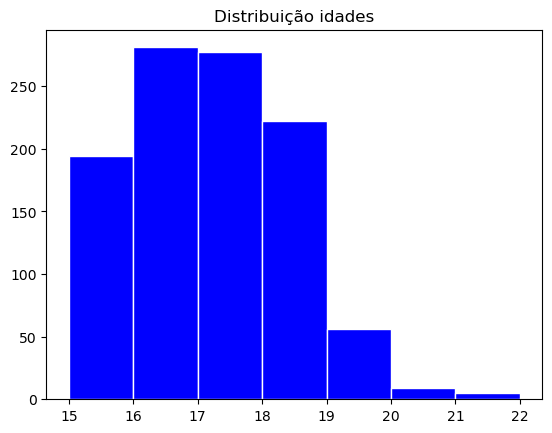

In [7]:
plt.hist(df.age, bins=7, color = 'blue',edgecolor = 'white')
plt.title('Distribuição idades')
plt.show()

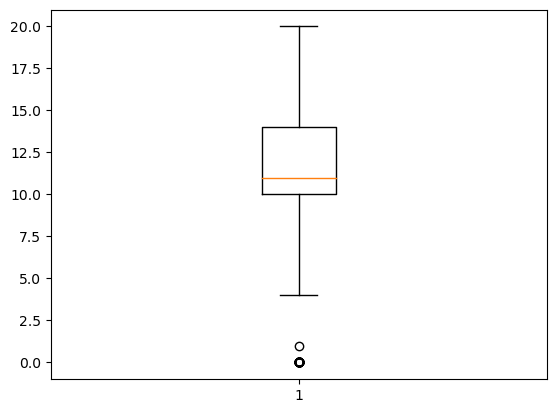

In [8]:
#Boxplot da nota final
plt.boxplot(df.G3)
plt.show()

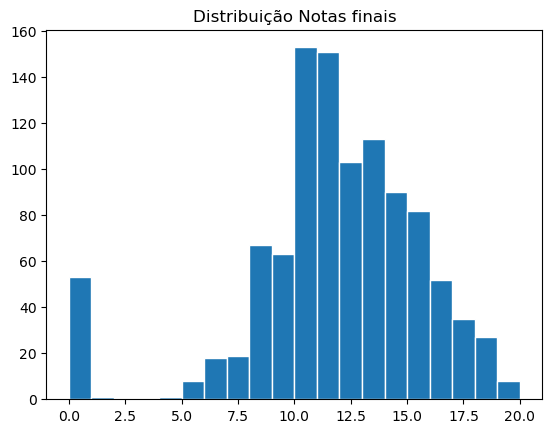

In [9]:
#Distribuição dados nota final 'G3'
plt.hist(df.G3, bins = 20, edgecolor = 'white')
plt.title('Distribuição Notas finais')
plt.show()

In [10]:
#A correlação mostra que a nota e o temp de estudo tempo correlação, mas bem mais baixa do que eu esperava
df.corr()['G3']

C:\Users\user\AppData\Local\Temp\ipykernel_17668\3628379334.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['G3']


age          -0.125282
traveltime   -0.102627
studytime     0.161629
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
G3            1.000000
Name: G3, dtype: float64

In [11]:
#Substituindo YES/NO nas colunas por booleano
df['schoolsup'] = df['schoolsup'].map( {'yes':1 ,'no':0}) 
df['famsup'] = df['famsup'].map( {'yes':1 ,'no':0}) 
df['paid'] = df['paid'].map( {'yes':1 ,'no':0}) 
df['activities'] = df['activities'].map( {'yes':1 ,'no':0}) 
df['internet'] = df['internet'].map( {'yes':1 ,'no':0}) 
df['romantic'] = df['romantic'].map( {'yes':1 ,'no':0}) 

In [12]:
#Substituindo Sex por booleano, sendo F = 1 e M = 0
df['sex'] = df['sex'].map({'F':1, 'M':0})

#Substituindo famsize por booleano, sendo GT3 = 0, LE3 = 1
df['famsize'] = df['famsize'].map({'GT3':0, 'LE3':1})

#Substituindo Pstatus por booleano, sendo T mora com os pais = 0, A alone = 1
df['Pstatus'] = df['Pstatus'].map({'T':0, 'A':1})

In [16]:
#Normalizando idade e absences
cols = ['age', 'absences']
ss_scaler = StandardScaler()
df[cols] = ss_scaler.fit_transform(df[cols])

In [17]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,1,1.027889,0,1,2,2,1,0,0,0,0,0,4,3,4,0.252155,6
1,1,0.221035,0,0,1,2,0,1,0,0,1,0,5,3,3,-0.070060,6
2,1,-1.392674,1,0,1,2,1,0,1,0,1,0,4,3,2,0.896584,10
3,1,-1.392674,0,0,1,3,0,1,1,1,1,1,3,2,2,-0.392275,15
4,1,-0.585820,0,0,1,2,0,1,1,0,0,0,4,3,2,-0.070060,10


In [18]:
df.corr()['G3']

sex           0.031472
age          -0.125282
famsize       0.061209
Pstatus       0.030693
traveltime   -0.102627
studytime     0.161629
schoolsup    -0.079346
famsup        0.013313
paid         -0.049388
activities    0.033998
internet      0.107064
romantic     -0.098363
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
G3            1.000000
Name: G3, dtype: float64

MILENA, dois pontos aqui que tu podes me ajudar aqui:
1: Escolhi substituir todas as variáveis acima por booleano pq elas tinham apenas uma variação de dado. Tu farias diferente?
Fiquei em dúvida se em famsize e Pstatus não deveria ter feito OHE

2: Em Absences e Idade usei Standar Scaller, mas não tenho certeza se era necessário.

In [19]:
# Organizando os dataset de teste e treino
dftrain, dftest = train_test_split(df, test_size = 0.20, random_state = 0)
print(df.shape)
print(dftrain.shape)
print(dftest.shape)

(1044, 17)
(835, 17)
(209, 17)


In [20]:
df.head(2)

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,1,1.027889,0,1,2,2,1,0,0,0,0,0,4,3,4,0.252155,6
1,1,0.221035,0,0,1,2,0,1,0,0,1,0,5,3,3,-0.070060,6


In [21]:
xtr = dftrain [['sex', 'age', 'famsize', 'Pstatus', 'studytime', 'schoolsup', 'famsup',
         'paid', 'activities', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'absences']]
ytr = dftrain['G3']

In [22]:
#Iniciando o aprendizado de máquina:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

In [23]:
#Modelo de regressão linear
lin_reg = LinearRegression()
lin_reg.fit(xtr, ytr)

LinearRegression()

In [24]:
RMSE(ytrue = ytr, ypred = lin_reg.predict(xtr))

3.839676659420834

In [25]:
r2_score(y_true=ytr, y_pred=lin_reg.predict(xtr))

0.09560729138584878

In [26]:
#Modelo KNN
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(xtr, ytr)
    
    preds = knn.predict(xtr)
    
    rmse_train = RMSE(ytrue = ytr, ypred = preds)
    r2_train = r2_score(y_true = ytr, y_pred = preds)
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

K = 1 | RMSE:1.0 / R2: 0.94
K = 2 | RMSE:2.56 / R2: 0.6
K = 5 | RMSE:3.29 / R2: 0.33
K = 10 | RMSE:3.57 / R2: 0.22
K = 20 | RMSE:3.73 / R2: 0.15
K = 50 | RMSE:3.82 / R2: 0.11


In [27]:
# Modelo Arvore de decisão
max_profundidades = [1, 5, 10, 100]

for m in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = m)
    dt.fit(xtr, ytr)
    
    preds = dt.predict(xtr)
    
    rmse_train = RMSE(ytrue = ytr, ypred = preds)
    r2_train = r2_score(y_true = ytr, y_pred = preds)
    
    print("Profundidade da árvore = " + str(m) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

Profundidade da árvore = 1 | RMSE:4.0 / R2: 0.02
Profundidade da árvore = 5 | RMSE:3.45 / R2: 0.27
Profundidade da árvore = 10 | RMSE:1.89 / R2: 0.78
Profundidade da árvore = 100 | RMSE:0.71 / R2: 0.97


A análise inicial demonstrou péssimos resultados no modelo de regressão linear, além disso há indícios que os modelos KNN1 
e árvores de decisões de profundidade 100 estão overfitando.

In [28]:
#Iniciando a validação cruzada
cv_lin_reg = cross_val_score(estimator = LinearRegression(), 
                             X = xtr, 
                             y = ytr, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

[0.04485953 0.10006529 0.06110349 0.0280767  0.04600264]
media:  0.05602153169391242
desvio padrão:  0.024378516282109675


In [29]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = xtr, 
                                 y = ytr, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(xtr, ytr)
    r2_train = r2_score(y_true=ytr, y_pred=modelo.predict(xtr))
    plt.figure(figsize=[6,4])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(-1.1, 1.1, 0.2))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([-1.05,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

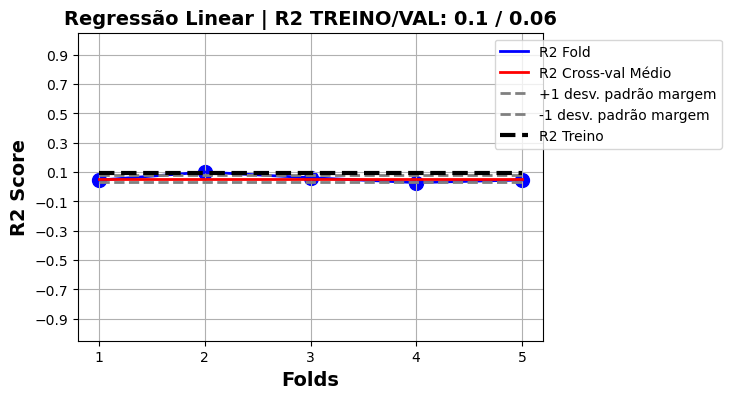

In [30]:
#Gráfico demonstrativo da métrica R2: Regressão linear
cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = xtr, 
                           y = ytr, 
                           num_folds = 5)

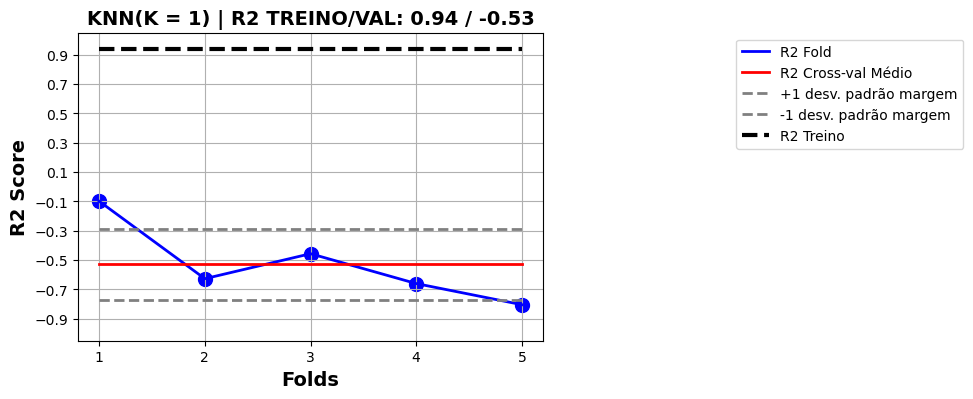

In [31]:
#Gráfico demonstrativo da métrica R2: KNN1
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = xtr, 
                           y = ytr, 
                           num_folds = 5)

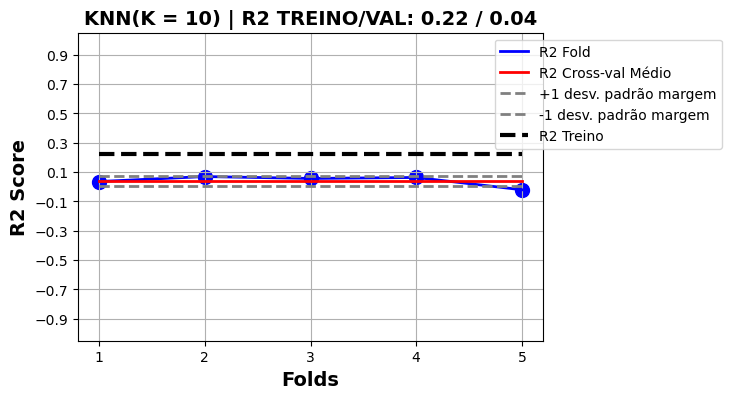

In [32]:
#Gráfico demonstrativo da métrica R2: KNN10
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = xtr, 
                           y = ytr, 
                           num_folds = 5)

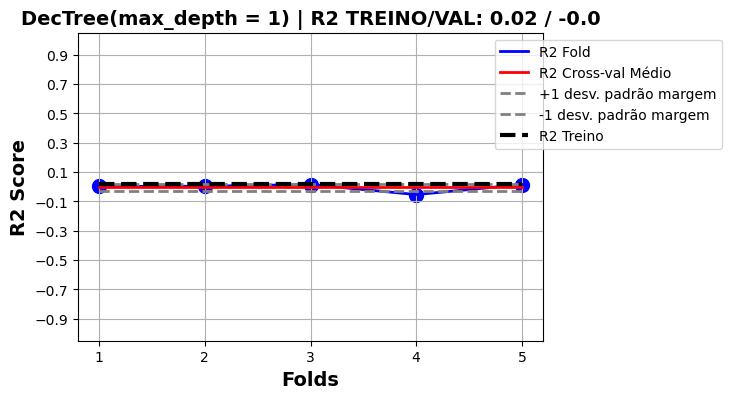

In [33]:
#Gráfico demonstrativo da métrica R2: Tree 1
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                           nome_modelo = 'DecTree(max_depth = 1)',
                           X = xtr, 
                           y = ytr, 
                           num_folds = 5)

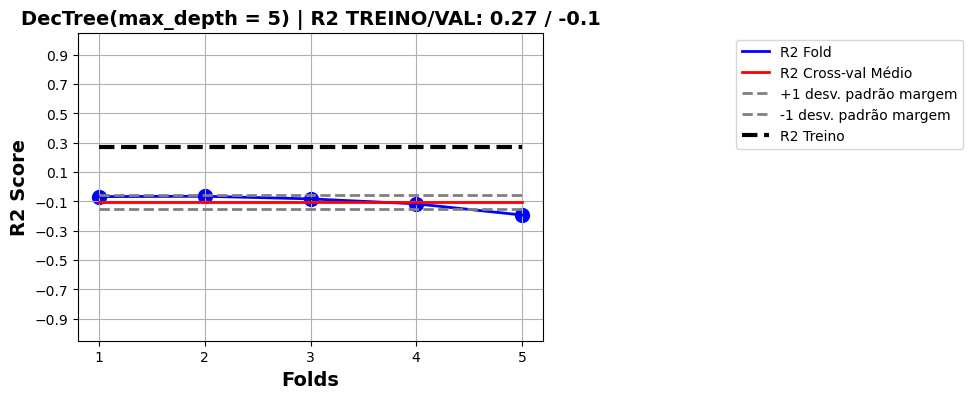

In [34]:
#Gráfico demonstrativo da métrica R2: Tree 5
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 5),
                           nome_modelo = 'DecTree(max_depth = 5)',
                           X = xtr, 
                           y = ytr, 
                           num_folds = 5)

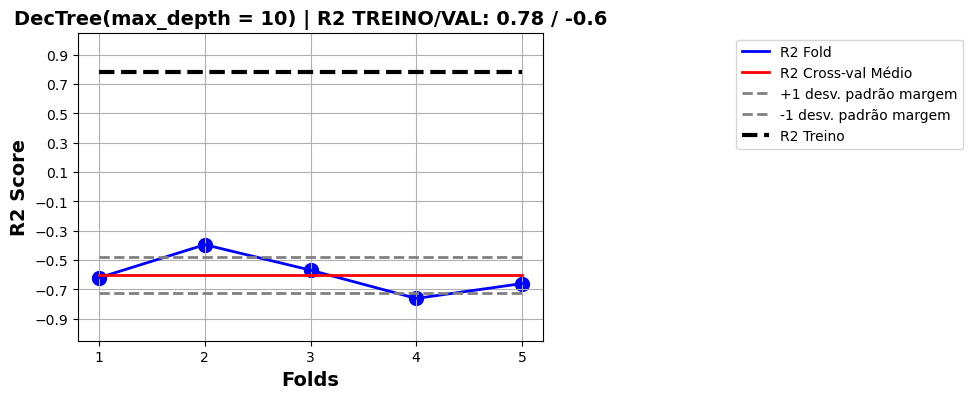

In [35]:
#Gráfico demonstrativo da métrica R2: Tree 10
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 10),
                           nome_modelo = 'DecTree(max_depth = 10)',
                           X = xtr, 
                           y = ytr, 
                           num_folds = 5)

O melhor modelo olhando apenas para R2 de treino é a arvore de decisão de profundidade 10, mas olhando para o quadro geral, a validação cruzada teve resultados péssimos em todos os modelos.
Tu achas que errei em algo no tratamento dos dados? 